In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.20, shuffle=True)

In [8]:
#Diseñamos el modelo
n_estimators=100
# Ajustar modelo de regresión
# Estime la puntuación en todo el conjunto de datos, sin valores perdidos
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(x_training_set, y_training_set)
y_predicted = model.predict(x_test_set)
y_predicted

array([26.17 , 20.574, 26.473, 19.147,  9.648, 29.165, 18.283,  6.975,
       19.053,  9.694, 19.691, 24.338, 31.37 , 34.277, 21.   , 43.93 ,
       19.556, 16.36 , 19.819, 46.061, 26.995, 21.555, 22.996, 19.448,
       45.931, 19.662, 33.972, 22.759, 19.397, 30.581, 33.738, 22.52 ,
       32.542, 22.362, 14.076, 23.715, 19.351, 16.14 , 33.037, 43.227,
       14.985, 24.137, 23.702, 20.315, 20.113, 43.774, 43.617, 23.373,
       23.1  , 12.136, 24.426, 31.09 , 26.912, 22.137, 23.665, 48.834,
       18.991, 30.77 ,  8.942, 14.645, 19.635, 20.895, 19.35 , 21.209,
       16.537, 14.524, 21.79 , 11.913, 34.196, 27.343, 38.264, 26.946,
       20.624, 46.306, 21.019, 20.67 , 18.453, 13.37 , 18.218, 21.239,
       46.952, 18.701, 14.445, 12.549, 20.202, 36.097, 15.705, 11.084,
       14.916, 10.042, 18.164,  9.149, 24.769, 14.541, 23.088, 22.699,
       24.505, 20.814, 26.028, 15.923, 31.919, 20.07 ])

In [9]:
#Evaluamos el modelo
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
print("Coefficient of determination R^2 of the prediction.: ",model_score)

Coefficient of determination R^2 of the prediction.:  0.9819864497385851


In [10]:
# El error cuadrático medio
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Puntuación de varianza explicada: 1 es una predicción perfecta
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

Mean squared error: 11.27
Test Variance score: 0.88


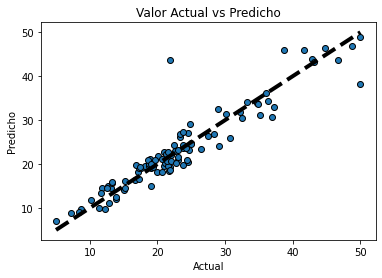

In [11]:
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicho')
ax.set_title("Valor Actual vs Predicho")
plt.show()